<a href="https://colab.research.google.com/github/1028Luo/ML-STUDY-NOTES/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

In [ ]:
# Feature engineering
# Create new features to improve prediction accuracy
# Say instead of the amount of each ingredient of cement, create new features of the ratio of each ingredient, which better captures their real relation.

In [ ]:
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]


# Mutual Information


In [4]:
# Muatual information
# MI measures how relevant a feature is to the target by calculating entropy. Can use this to see it a feature is useful


In [7]:
# install and import
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# import data
path = kagglehub.dataset_download("toramky/automobile-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/Automobile_data.csv")
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/toramky/automobile-dataset/versions/2


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


curb-weight          1.391913
horsepower           1.265276
engine-size          1.009020
highway-mpg          0.938873
city-mpg             0.827939
stroke               0.748882
normalized-losses    0.683328
bore                 0.679730
width                0.628485
length               0.565615
wheel-base           0.564531
make                 0.556132
fuel-system          0.449312
peak-rpm             0.421077
height               0.350044
drive-wheels         0.314699
num-of-cylinders     0.312901
symboling            0.214021
compression-ratio    0.190846
engine-type          0.156659
aspiration           0.080795
body-style           0.057498
fuel-type            0.039664
engine-location      0.035099
num-of-doors         0.006405
Name: MI scores, dtype: float64


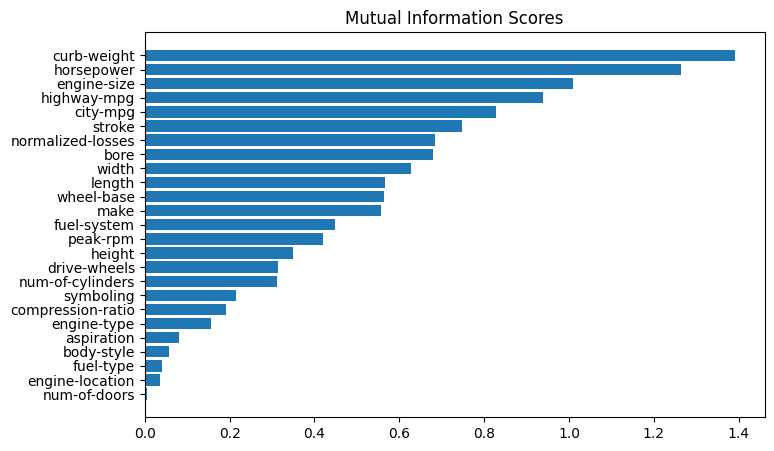

In [80]:
X = df.copy()
y = X.pop("price") # extract price from X and assign to Y

# Encoding for categorical columns,
# this allows them to be treated as discrete
# int and object(string/categorical) are treated as discrete
# float are treated as continuous
# The scikit-learn algorithm for MI treats discrete features differently from continuous features.
# Consequently, you need to tell it which are which. As a rule of thumb,
# anything that must have a float dtype is not discrete.
# Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding.
for colname in X.select_dtypes("object"):
  X[colname],_ = X[colname].factorize()

# y contains "?" so replace it
y = y.replace("?", pd.NA)
y = y.fillna(0)

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression # real value targets
from sklearn.feature_selection import mutual_info_classif # for cate targets

def make_mi_socres(X, y, discrete_features):

  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name = "MI scores", index = X.columns)
  mi_scores = mi_scores.sort_values(ascending = False)
  return mi_scores

mi_scores = make_mi_socres(X, y, discrete_features)
print(mi_scores)


import matplotlib.pyplot as plt
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Creating Features

In [ ]:
# ways to create features
# including but not limited to:
# Mathematical transforms, group transforms, build up and break down
# https://www.kaggle.com/code/ryanholbrook/creating-features#Counts

# Clustering with K-Means

In [ ]:
# Unsupervised learning, a classification alog

In [ ]:
# Place k centroids in the feature space,
# iterate the following
#   1. assign each point to the nearest centroid
#   2. move each centroid to minimize the distance to its points

In [101]:
# install and import
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# import data
path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/housing.csv")
X = df.loc[:, ["median_income", "latitude", "longitude"]]
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [104]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,1


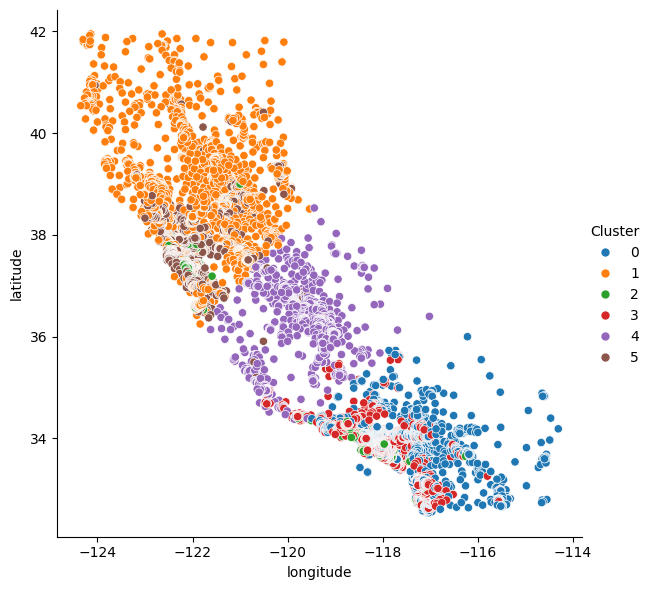

In [105]:
import seaborn as sns

sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

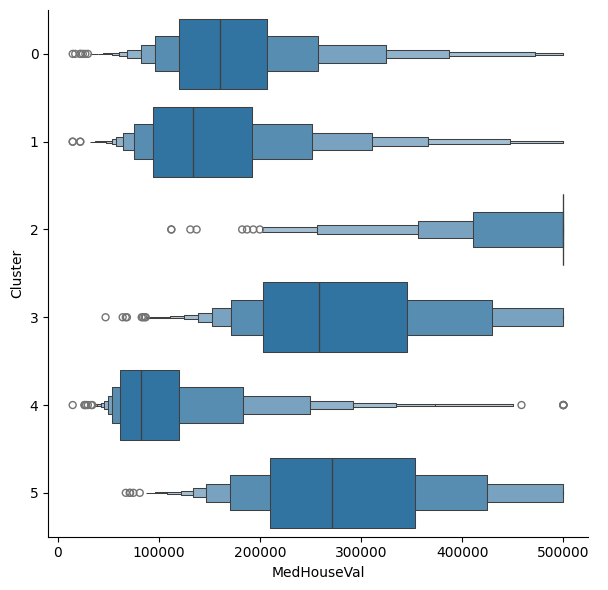

In [106]:
X["MedHouseVal"] = df["median_house_value"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);

# Principle Component Analysis (PCA)

In [ ]:
# Essentially create new features using the "axes of variation"
# Say for abalone,
# Often, we can give names to these axes of variation.
# The longer axis we might call the "Size" component: small height and small diameter (lower left) contrasted with large height and large diameter (upper right).
# The shorter axis we might call the "Shape" component: small height and large diameter (flat shape) contrasted with large height and small diameter (round shape).
#https://www.kaggle.com/code/ryanholbrook/principal-component-analysis

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

# Target Encoding

In [ ]:
# Encodes a feature using information from the target
# A better alternative to one-hot encoding when dealing with
# high-cardinality categorical variables (e.g., city names, product IDs).
# Captures relationships between categories and the target variable,
# which can improve model performance.

# Say there are many car makes and the target is price
# target_encoding = avg price of each make

In [ ]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)
